#**Data Understanding**

**Attibute Information**

**olist_customers_dataset.csv**

| Attribute | Data Type | Description |
| --- | --- | --- |
| customer_id | object | key to the orders dataset. Each order has a unique customer_id. |
| customer_unique_id | object | unique identifier of a customer |
| customer_zip_code_prefix | object | first five digits of customer zip code |
| customer_city | datetime | customer city name |
| customer_state | object | customer state |

**olist_orders_dataset.csv**

| Attribute | Data Type | Description |
| --- | --- | --- |
| order_id | object | unique identifier of the order |
| customer_id | object | key to the customer dataset. Each order has a unique customer_id |
| order_status | object | reference to the order status (delivered, shipped, etc) |
| order_purchase_timestamp | datetime | shows the purchase timestamp |
| order_approved_at | datetime | shows the payment approval timestamp |
| order_delivered_carrier_date | datetime | shows the order posting timestamp. when it was handled to the logistic partner. |
| order_delivered_customer_date | datetime | shows the actual order delivery date to the customer |
| order_estimated_delivery_date | datetime | shows the estimated delivery date that was informed to customer at the purchase moment. |


**olist_order_items_dataset.csv**

| Attribute | Data Type | Description |
| --- | --- | --- |
| order_id | object | unique identifier of the order |
| order_item_id | object | sequential number identifying number of items included in the same order. |
| product_id | object | product unique identifier |
| seller_id | object | seller unique identifier |
| shipping_limit_date | datetime | shows the seller shipping limit date for handling the order over to the logistic partner. |
| price | float | item price |
| freight_value | float | item freight value item (if an order has more than one item the freight value is splitted between items) |


**olist_order_payments_dataset.csv**

| Attribute | Data Type | Description |
| --- | --- | --- |
| order_id | object | unique identifier of the order |
| payment_sequential | integer| a customer may pay an order with more than one payment method. If he does so, a sequence will be created to |
| payment_type | object | method of payment chosen by the customer. |
| payment_installments | integer | number of installments chosen by the customer |
| payment_value | float | transaction value |


**olist_order_payments_dataset.csv**

| Attribute | Data Type | Description |
| --- | --- | --- |
| order_id | object | unique identifier of the order |
| product_category_name | integer| root category of product, in Portuguese |
|  product_name_lenght | object | number of characters extracted from the product name |
| product_description_lenght | integer | number of characters extracted from the product description |
|  product_photos_qty | float | number of product published photos |
|  product_weight_g | object | product weight measured in grams |
| product_length_cm | integer | product length measured in centimeters |
| product_height_cm | float | product height measured in centimeters |
| product_width_cm | float | product width measured in centimeters |

**Dataset Context**

Dataset ini disediakan dengan oleh Olist, department store terbesar di pasar Brasil. Olist menghubungkan usaha kecil dari seluruh Brasil ke saluran tanpa kerumitan dan dengan satu kontrak. Para pedagang tersebut dapat menjual produk mereka melalui Olist Store dan mengirimkannya langsung ke pelanggan menggunakan mitra logistik Olist. Lihat lebih lanjut di situs web: www.olist.com

Setelah pelanggan membeli produk dari Olist Store, penjual akan diberi tahu untuk memenuhi pesanan tersebut. Setelah pelanggan menerima produk, atau perkiraan tanggal pengiriman, pelanggan akan mendapatkan survei kepuasan melalui email di mana ia dapat memberikan catatan untuk pengalaman pembelian dan menuliskan beberapa komentar.

**Problem Statement**

Bagaimana insight dari transaksi belanja dari aplikasi Olist dan segmentasi kustomer apa saja yang terbentuk?

**Goals**
- Menemukan insight dari hasil record data transaksi belanja di situs aplikasi yang disediakan oleh Olist.
- Melatih dan testing model untuk melakukan Clustering dari Dataset dengan Algoritma yang memiliki performa terbaik.

**Analytical Approach**

Pendekatan yang digunakan yaitu:
  1. Exploratory Data Analytics.
  2. Clustering Analysis with Machine Learning.

**Evaluation Metrics**

- Metrik evaluasi yang akan digunakan yaitu Elbow Method (inertia), Silhouette Score, Calinski-Harabasz Index.
- Memilih model terbaik dari Silhouette Score tertinggi dari semua Algoritma Machine Learning yang di latih.


#**Data Preparation/Preprocessing**

##**1. Import Library**

In [ ]:
# Common library used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import calendar
import warnings
warnings.filterwarnings('ignore')

##**2. Load Dataset**

In [ ]:
# load dataset from google drive storage
pd.set_option('display.max_columns', None)
df_customer = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Brazilian E-commerce Public Dataset/Dataset/olist_customers_dataset.csv')
df_order = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Brazilian E-commerce Public Dataset/Dataset/olist_orders_dataset.csv')
df_order_items = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Brazilian E-commerce Public Dataset/Dataset/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Brazilian E-commerce Public Dataset/Dataset/olist_order_payments_dataset.csv')
df_product = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Brazilian E-commerce Public Dataset/Dataset/olist_products_dataset.csv')

In [ ]:
# check df_customer dataset
df_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
# check df_order dataset
df_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
# check df_order_items dataset
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
# check df_order_payments dataset
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
# check df_product dataset
df_product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


##**3. Data Cleansing**

###**- Check Information Dataset**

####**df_customer**

In [ ]:
# check information of customer dataset
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


####**df_order**

In [ ]:
# check information of customer dataset
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


####**df_order_items**

In [ ]:
# check information of customer dataset
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


####**df_order_payments**

In [ ]:
# check information of customer dataset
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


####**df_product**

In [ ]:
# check information of customer dataset
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#####**Take Decision**

> - Drop kolom yang tidak relevan untuk dianalisa pada `df_customer` diantaranya: `customer_unique_id`, `customer_zip_code_prefix`.
>
> - Drop kolom yang tidak relevan untuk dianalisa pada `df_order_items` diantaranya: `order_item_id`, `seller_id`,`shipping_limit_date`.
>
> - Drop kolom yang tidak relevan untuk dianalisa pada `df_order_payments` diantaranya: `payment_sequential`.
>
> - Terdapat missing value pada dataset berikut: `df_order` dan `df_product`. untuk analisa missing value dan drop kolom yang tidak relevan akan dilanjutkan bagian Check Missing Values untuk kedua dataset tersebut.

In [ ]:
# drop irrelevan columns
df_customer = df_customer.drop(columns=['customer_unique_id', 'customer_zip_code_prefix'], axis=1)

# drop irrelevan columns
df_order_items = df_order_items.drop(columns=['order_item_id','seller_id','shipping_limit_date'], axis=1)

# drop irrelevan columns
df_order_payments = df_order_payments.drop(columns=['payment_sequential'], axis=1)

> - Kita akan membuat kolom baru "count_order" yang berisi nilai dari hasil perhitungan ulang  dari jumlah "order_id" + "product_id" yang sama/indetik pada baris yang ada di dataset `df_order_items`.
>
> - Selanjutnya kita akan mengevaluasi kolom `price` + `freight_value` + `count_order` pada dataset `df_order_items` dataset yang dihubungkan dengan kolom `payment_value` pada dataset `df_order_payments`.


In [ ]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   product_id     112650 non-null  object 
 2   price          112650 non-null  float64
 3   freight_value  112650 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.4+ MB


In [ ]:
# copy dataset
order_items_df = df_order_items.copy()

# Count the number of rows that have the same 'order_id' and 'product_id'
order_items_df['count_order'] = order_items_df.groupby(['order_id', 'product_id'])['order_id'].transform('count')

# Recalculated payment value
order_items_df['calculated_payment_value'] = round(
                                                    (order_items_df['price'] * order_items_df['count_order']) +
                                                    (order_items_df['freight_value'] * order_items_df['count_order']),2)

# Remove duplicates based on 'order_id', 'product_id', and 'count_order'
order_items_df = order_items_df.drop_duplicates(subset=['order_id', 'product_id', 'count_order'])


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  102425 non-null  object 
 1   product_id                102425 non-null  object 
 2   price                     102425 non-null  float64
 3   freight_value             102425 non-null  float64
 4   count_order               102425 non-null  int64  
 5   calculated_payment_value  102425 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.5+ MB


In [ ]:
order_items_df[order_items_df['count_order']==10]

,order_id,product_id,price,freight_value,count_order,calculated_payment_value
57297,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.20,7.89,10,90.9
57298,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,1.20,7.89,10,90.9
72121,a483ffe0ce133740ab12ebcba8a3ccf9,36f60d45225e60c7da4558b070ce4b60,109.89,13.11,10,1230.0
102583,e8fa22c3673b1dd17ea315021b1f0f61,0c9439abe84dc40a64fc164365c4d064,284.99,16.87,10,3018.6
109121,f80549a97eb203e1566e026ab66f045b,d5991653e037ccb7af6ed7d94246b249,137.90,38.81,10,1767.1


In [ ]:
order_items_df[order_items_df['order_id']=='8272b63d03f5f79c56e9e4120aec44ef'].sort_values('count_order',ascending=False)

,order_id,product_id,price,freight_value,count_order,calculated_payment_value
57297,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,90.90
57298,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,1.2,7.89,10,90.90
57317,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,7.8,6.57,1,14.37


In [ ]:
order_items_df[order_items_df['order_id']=='f80549a97eb203e1566e026ab66f045b'].sort_values('count_order',ascending=False)

,order_id,product_id,price,freight_value,count_order,calculated_payment_value
109121,f80549a97eb203e1566e026ab66f045b,d5991653e037ccb7af6ed7d94246b249,137.9,38.81,10,1767.1


In [ ]:
# Calculate manually from order_id = f80549a97eb203e1566e026ab66f045b
((137.9 * 10) + (38.81 * 10))

1767.1

In [ ]:
# Check sample of order_id for the same order_id in the row dataset
df_order_payments[df_order_payments['order_id']== 'f80549a97eb203e1566e026ab66f045b']

,order_id,payment_type,payment_installments,payment_value
27085,f80549a97eb203e1566e026ab66f045b,boleto,1,1767.1


> 1) Dari hasil analisa dari `price` + `freight_value` + `count_order` + `payment_value`, didapatkan hasil bahwa:
>
> - Hasil pada `payment_value` merupakan hasil dari perhitungan `(price x count_order) + (freight_value x count_order)`. Maka jika kita tidak mengetahui dengan pasti berapa jumlah setiap order dari setiap produk yang berbeda/sama, maka akan sulit mengetahui berapa harga total `payment_value` keseluruhan barang sebenarnya yang di order oleh customer.
>
> - Oleh karena itu, perhitungan manual disini dilakukan untuk mengkonfirmasi apakah besaran `payment_value` sesuai dengan perhitungan. sehingga kita mengetahui bahwa order tertentu secara total keseluruhan barang yang dibeli sesuai dengan rumus perhitungan (harga barang x jumlah barang) + (biaya kirim barang x jumlah barang).
>
> 2) Oleh karena itu diputuskan untuk membagi dataset menjadi 2, karena jika beberapa dataset tersebut digabungkan menjadi satu maka :
> - Dataset `df_customer_order`: gabungan dari dataset `df_customer` + `df_order_payment` + `df_order_payments`
> - Dataset `df_order_detail`: gabungan dari dataset `df_order_items` + `df_product`

In [ ]:
df_order_items

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72


In [ ]:
# Count the number of rows that have the same 'order_id' and 'product_id'
df_order_items['count_order'] = df_order_items.groupby(['order_id', 'product_id'])['order_id'].transform('count')

# Recalculated payment value
df_order_items['calculated_payment_value'] = round(
                                                    (df_order_items['price'] * df_order_items['count_order']) +
                                                    (df_order_items['freight_value'] * df_order_items['count_order']),2)

# Remove duplicates based on 'order_id', 'product_id', and 'count_order'
df_order_items = df_order_items.drop_duplicates(subset=['order_id', 'product_id', 'price', 'freight_value', 'count_order'])

###**- Check Missing Values**

In [ ]:
# create function to check missing value
def check_missing(data):
  missing_values = data.isna().sum().rename('Missing Values')
  missing_percent = (data.isna().sum() / len(data) * 100).rename('Percentage')
  return pd.concat([missing_values, missing_percent], axis=1)

####**df_order**

In [ ]:
# Check the missing value
check_missing(df_order)

,Missing Values,Percentage
order_id,0,0.000000
customer_id,0,0.000000
order_status,0,0.000000
order_purchase_timestamp,0,0.000000
order_approved_at,160,0.160899
order_delivered_carrier_date,1783,1.793023
order_delivered_customer_date,2965,2.981668
order_estimated_delivery_date,0,0.000000


> - Terdapat missing value pada `df_order`dataset
> - Dari beberapa kolom dari `df_order`, terdapat **missing value < 5%**.
> - Secara teoritis, boleh untuk drop/hapus missing value tersebut dari dataset.


####**df_product**

In [ ]:
# check if any missing value in the dataset
check_missing(df_product)

,Missing Values,Percentage
product_id,0,0.000000
product_category_name,610,1.851234
product_name_lenght,610,1.851234
product_description_lenght,610,1.851234
product_photos_qty,610,1.851234
product_weight_g,2,0.006070
product_length_cm,2,0.006070
product_height_cm,2,0.006070
product_width_cm,2,0.006070


> - Terdapat missing value pada `df_product`dataset
> - Dari beberapa kolom dari `df_product`, terdapat **missing value < 5%**.
> - Secara teoritis, boleh untuk drop/hapus missing value tersebut dari dataset.


####**Check Missing Value Pattern with Missingno**

#####**- Order Dataset**

<Axes: >

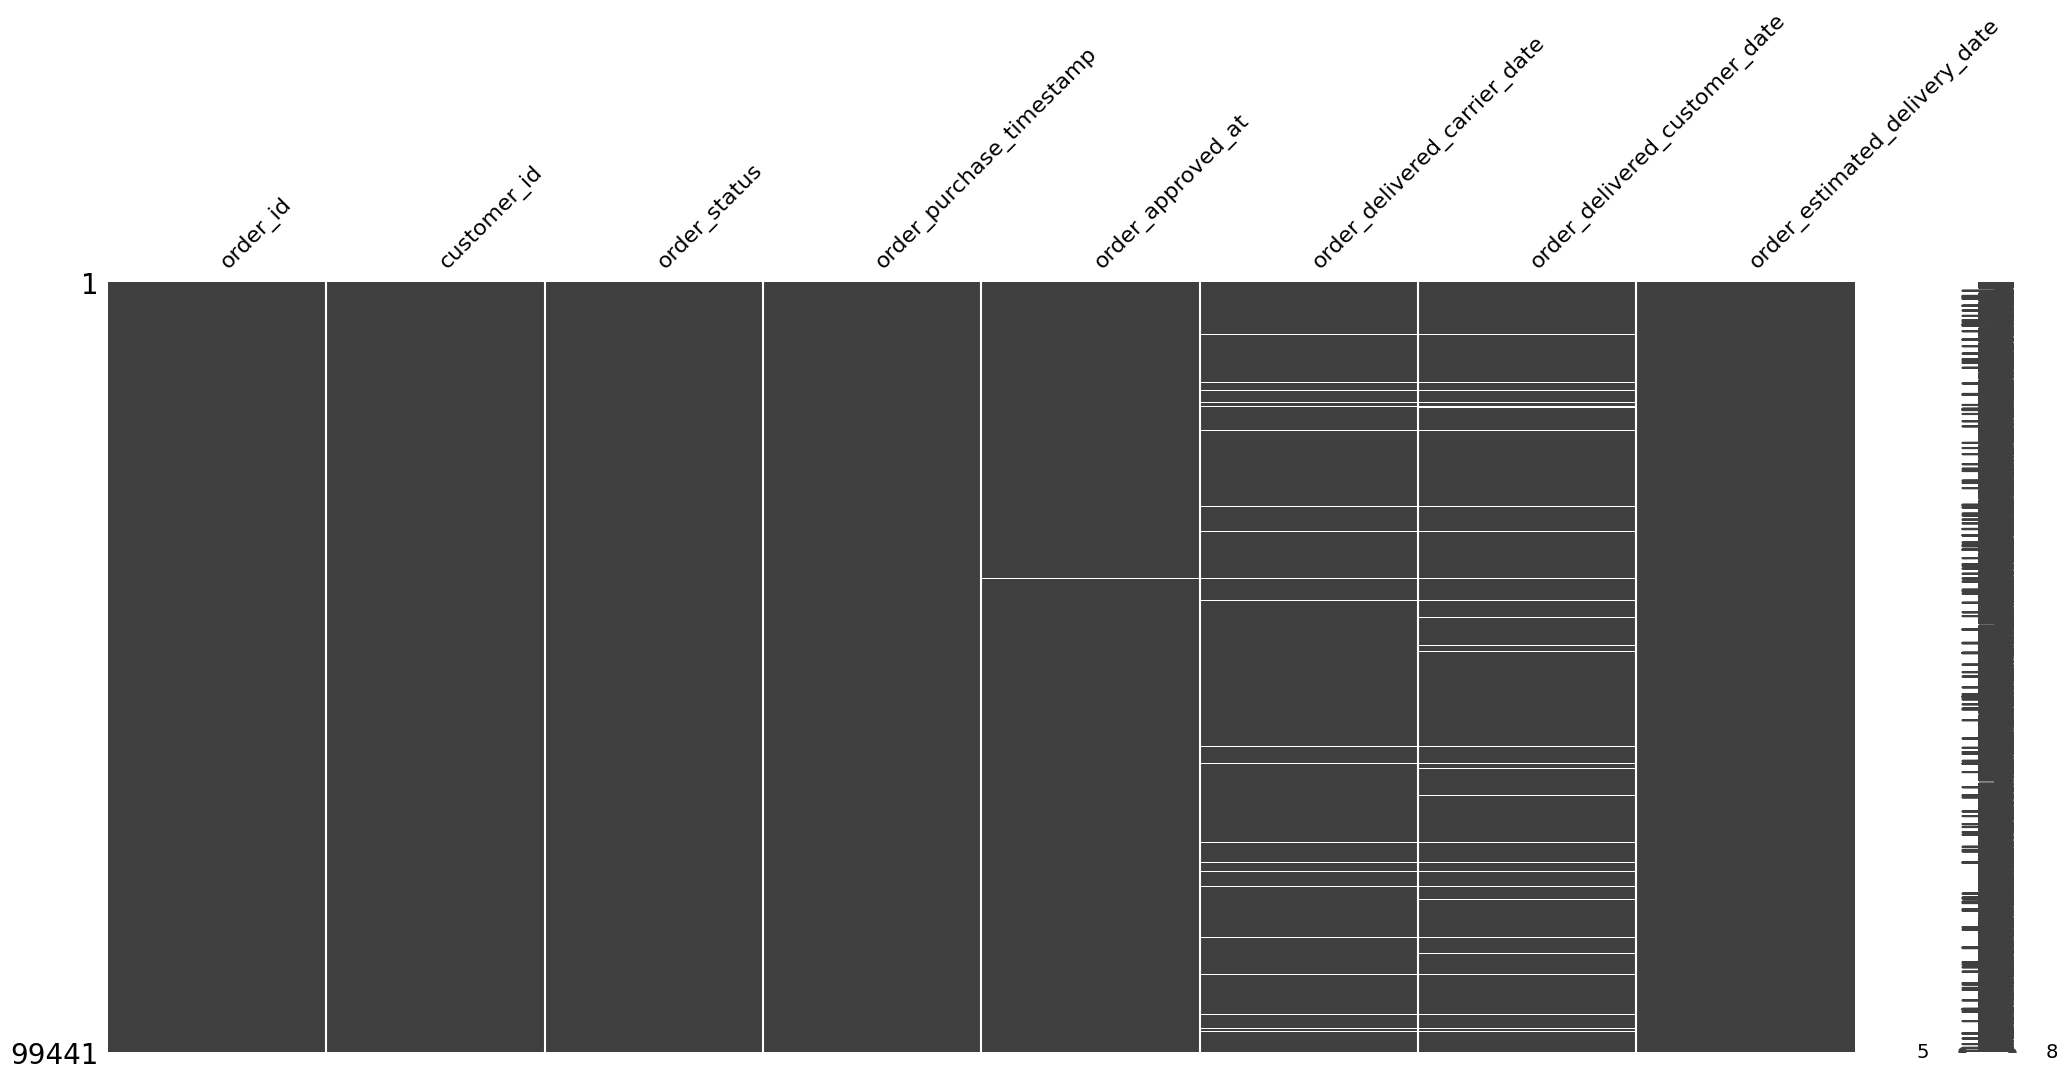

In [ ]:
msno.matrix(df_order)

<Axes: >

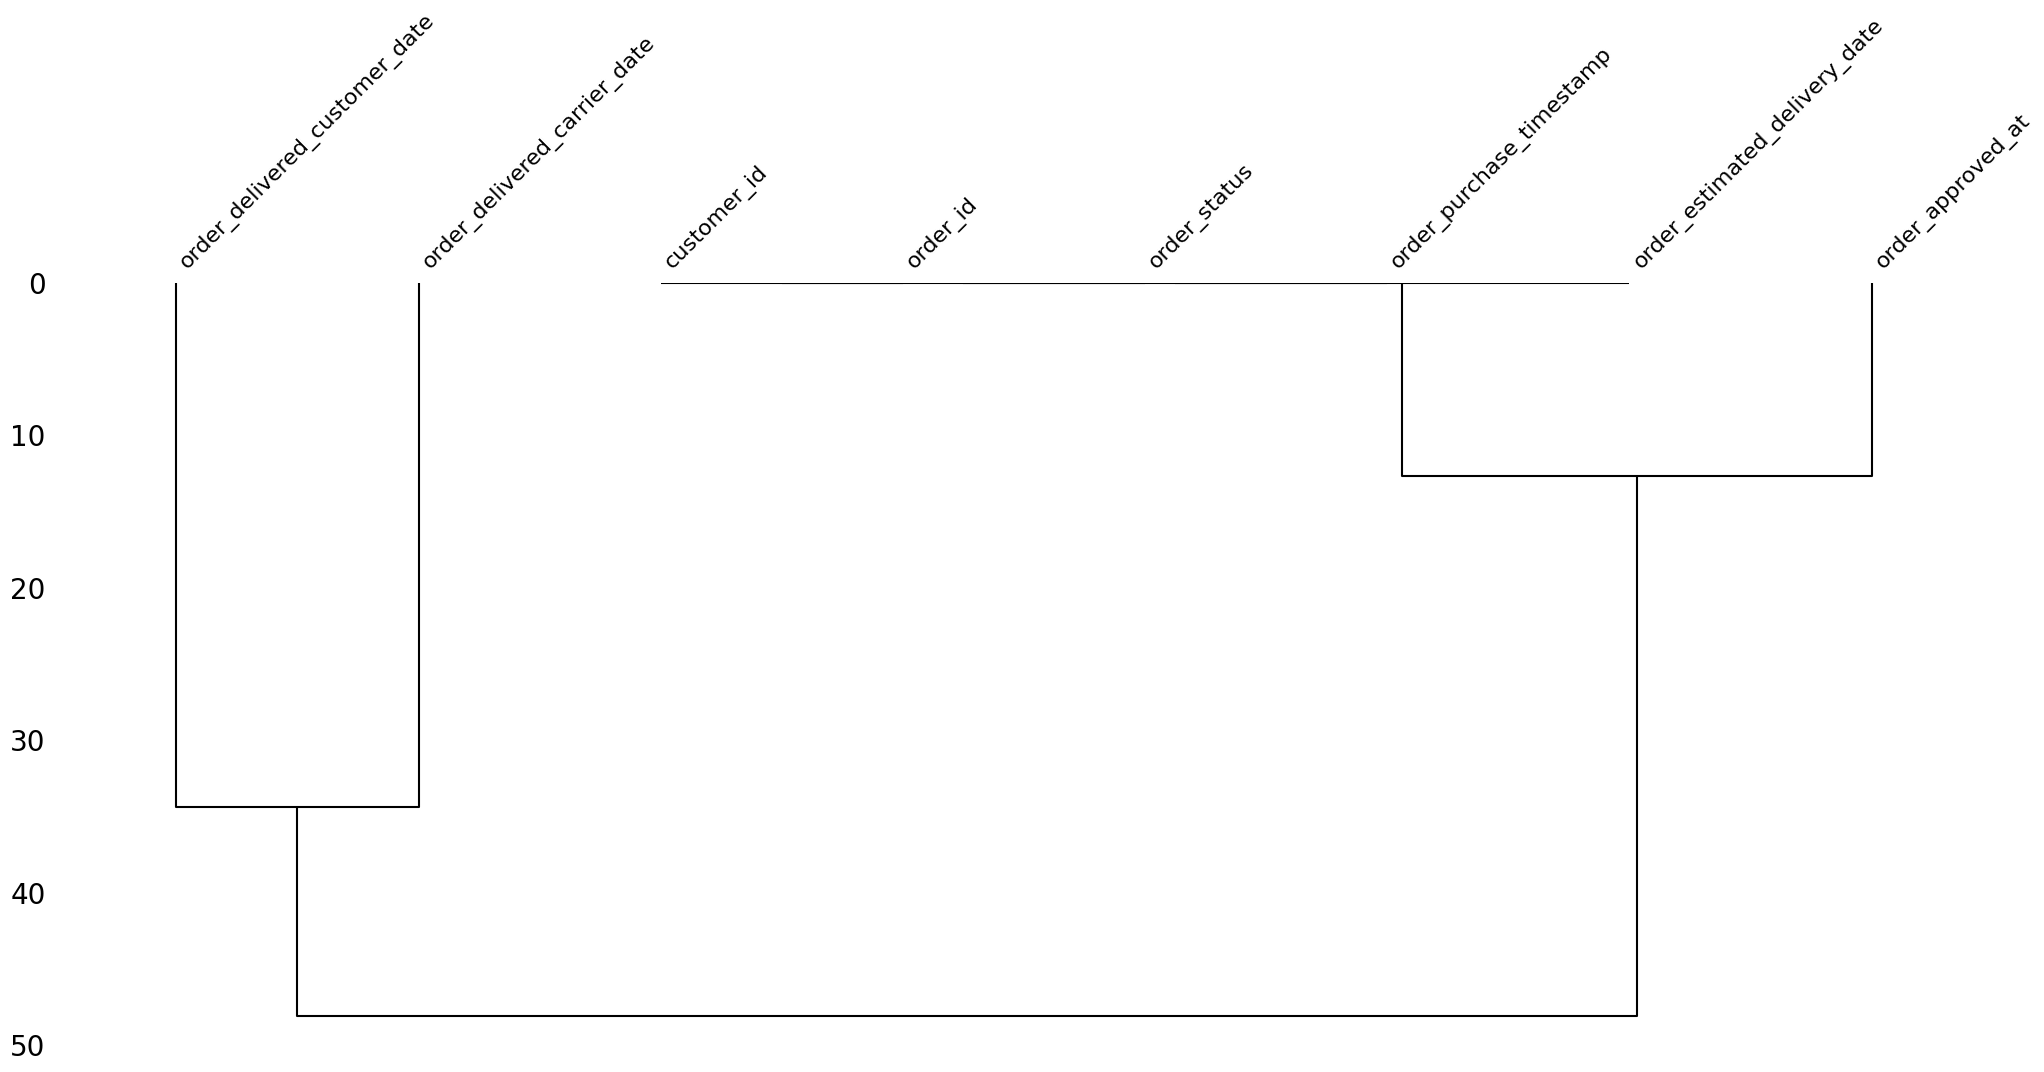

In [ ]:
msno.dendrogram(df_order)

<Axes: >

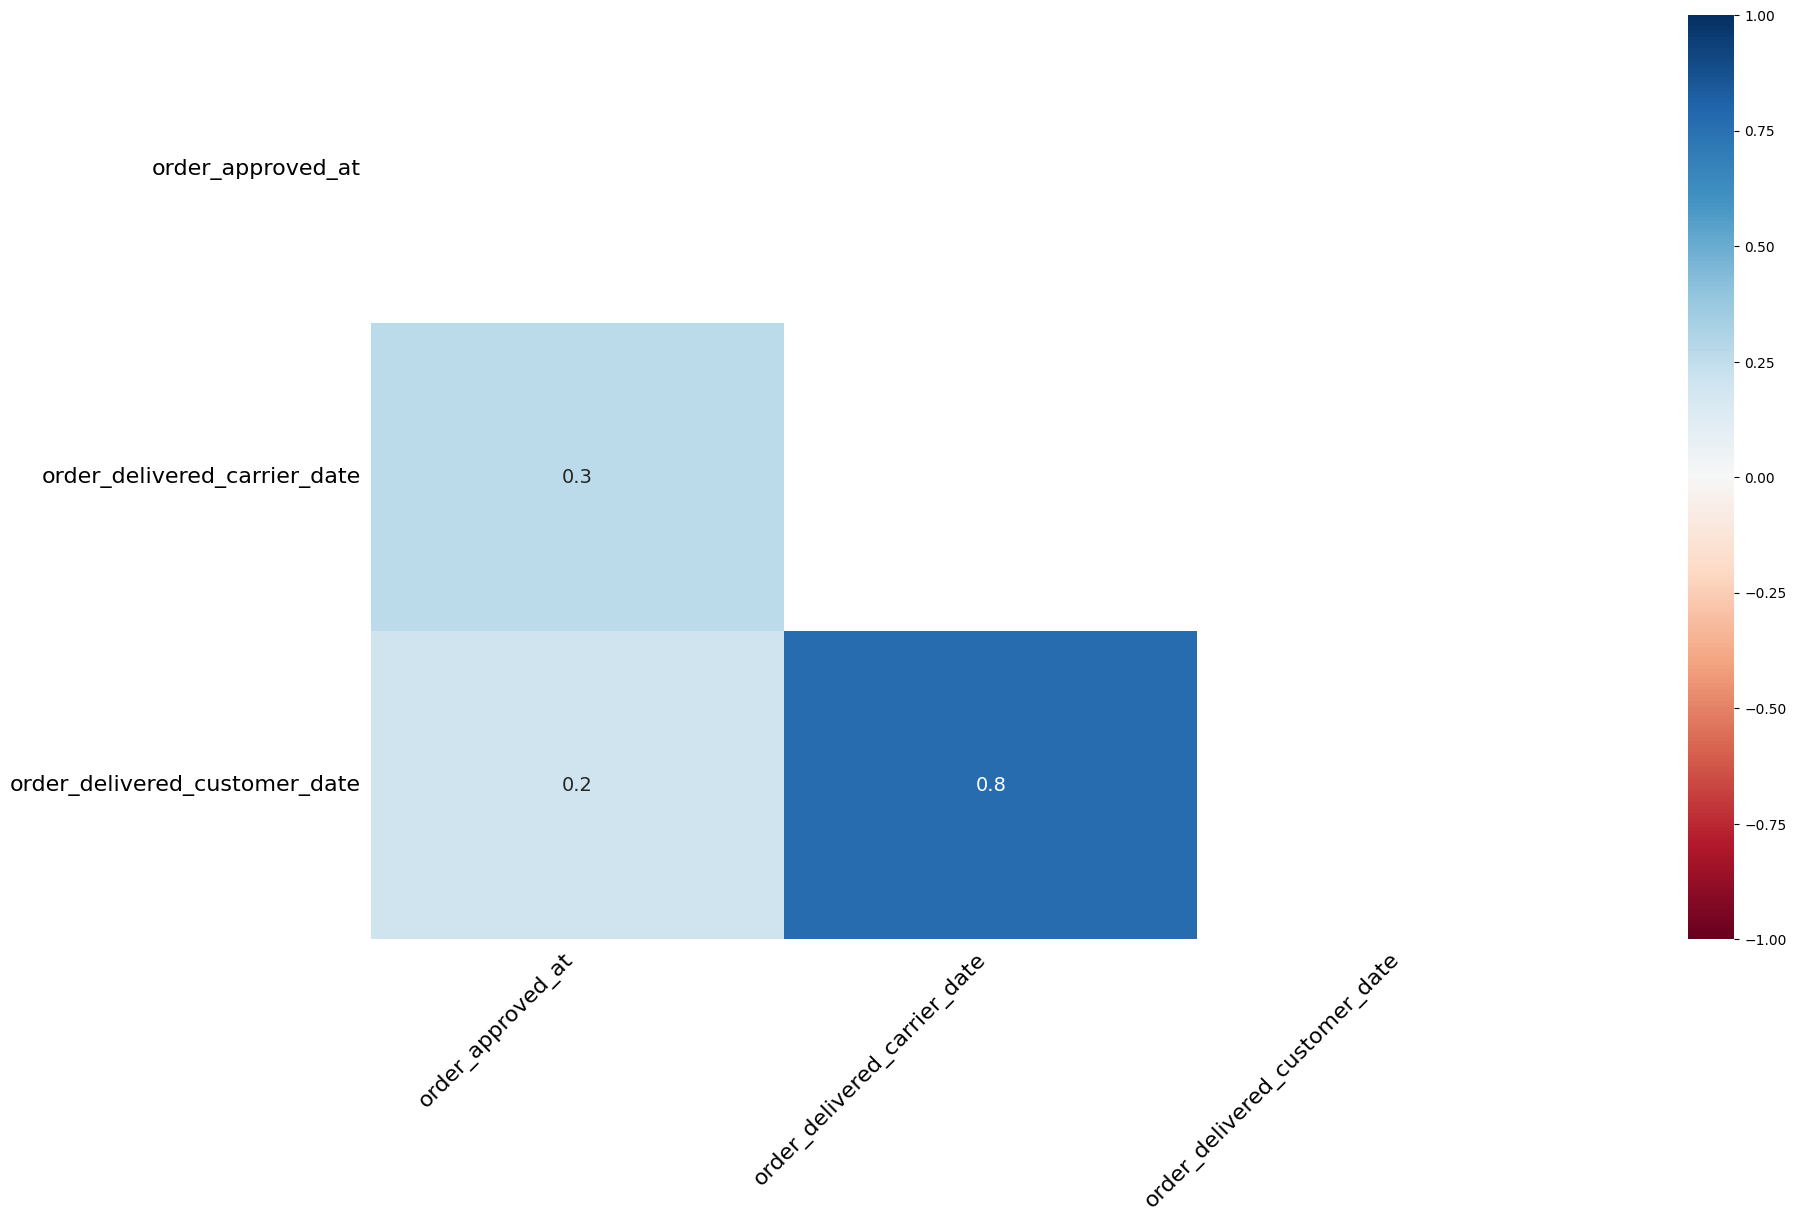

In [ ]:
msno.heatmap(df_order)

In [ ]:
# check detail missing values in several columns
missing_values_by_status = df_order.groupby('order_status').apply(lambda x: x.isnull().sum())
missing_values_by_status['total_missing'] = missing_values_by_status.sum(axis=1)
missing_values_by_status = missing_values_by_status.sort_values('total_missing', ascending=False)
missing_values_by_status

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_missing
order_status,,,,,,,,,
canceled,0,0,0,0,141,550,619,0,1310
unavailable,0,0,0,0,0,609,609,0,1218
shipped,0,0,0,0,0,0,1107,0,1107
invoiced,0,0,0,0,0,314,314,0,628
processing,0,0,0,0,0,301,301,0,602
delivered,0,0,0,0,14,2,8,0,24
created,0,0,0,0,5,5,5,0,15
approved,0,0,0,0,0,2,2,0,4


In [ ]:
df_order[(df_order['order_status']=='canceled')&(df_order.isna().any(axis=1))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
df_order[(df_order['order_status']=='shipped')&(df_order.isna().any(axis=1))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaN,2017-11-24 00:00:00
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaN,2018-08-03 00:00:00
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaN,2018-07-26 00:00:00
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaN,2018-07-24 00:00:00


In [ ]:
df_order[(df_order['order_status']=='delivered')&(df_order.isna().any(axis=1))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00


> Jika dianalisa dari dataset order, mengapa terjadi missing value dari beberapa kolom disebabkan oleh:
> - Missing value tampaknya terjadi karena ada hubungannya dengan `order_status`. jika terdapat missing value pada kolom `order_delivered_customer_date` dan `order_delivered_carrier_date`, maka belum ada/tidak ada order yang terkirim/deliviered kepada customer. selama `order_status` bukan berstatus 'deliviered', seharusnya data pada kolom `order_delivered_customer_date` dan `order_delivered_carrier_date` akan selalu kosong/NaN.
> - Hal ini terbukti jika dilihat dari `order_status` = 'canceled' berjumlah 625 dan missing value pada kolom `order_delivered_customer_date` berjumlah 619. artinya secara umum, status order yang cancel nampaknya menyebabkan missing value pada kolom `order_delivered_customer_date` dan juga `order_delivered_carrier_date`. dari sini dapat kita pahami bahwa, missing value pada kolom tersebut nampaknya dipicu oleh perilaku customer atau operational distribusi barang yang bermasalah.
> - Missing value pada `order_delivered_customer_date` dan jika `order_status` = 'delivered', nampaknya terjadi diasumsikan karena: 1) customer lupa melakukan verifikasi untuk penerimaan barang yang terkirim/delivered, 2) kegagalan sistem dalam menginput verifikasi dari customer.
> - Missing value pada `order_delivered_carrier_date` dan jika `order_status` = 'delivered', nampaknya terjadi diasumsikan karena: 1) kurir/pihak distributor lupa melakukan verifikasi untuk penerimaan barang yang terkirim/delivered, 2) kegagalan sistem dalam menginput verifikasi dari kurir/pihak distributor.
> - Missing value pada `order_approved_at` juga nampaknya terjadi diasumsikan karena: 1) kegagalan sistem dalam memverifikasi pembayaran yang dilakukan customer.

> Pengambilan keputusan:
> - Menghapus kolom `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date`.
> - Kolom yang dihapus tidak revelan untuk masuk dalam RFM Analysis untuk tujuan Customer Segmentation.
> - Kolom yang dihapus lebih relevan untuk tujuan Operational Analysis.
> - Menggunakan data dengan `order_status` = 'delivered' untuk RFM Analysis. karena customer segmentation hanya berlaku untuk order yang sukses/delivered.
> - Menghapus/drop data dengan `order_status` selain 'delivered','shipped', dan 'canceled' untuk EDA.

######**Take Decisions**

In [ ]:
# drop irrelevan columns
df_order = df_order.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)

In [ ]:
# only use relevan values in order status columns
df_order = df_order[df_order['order_status'].isin(['delivered', 'shipped', 'canceled'])]

#####**- Product Dataset**

<Axes: >

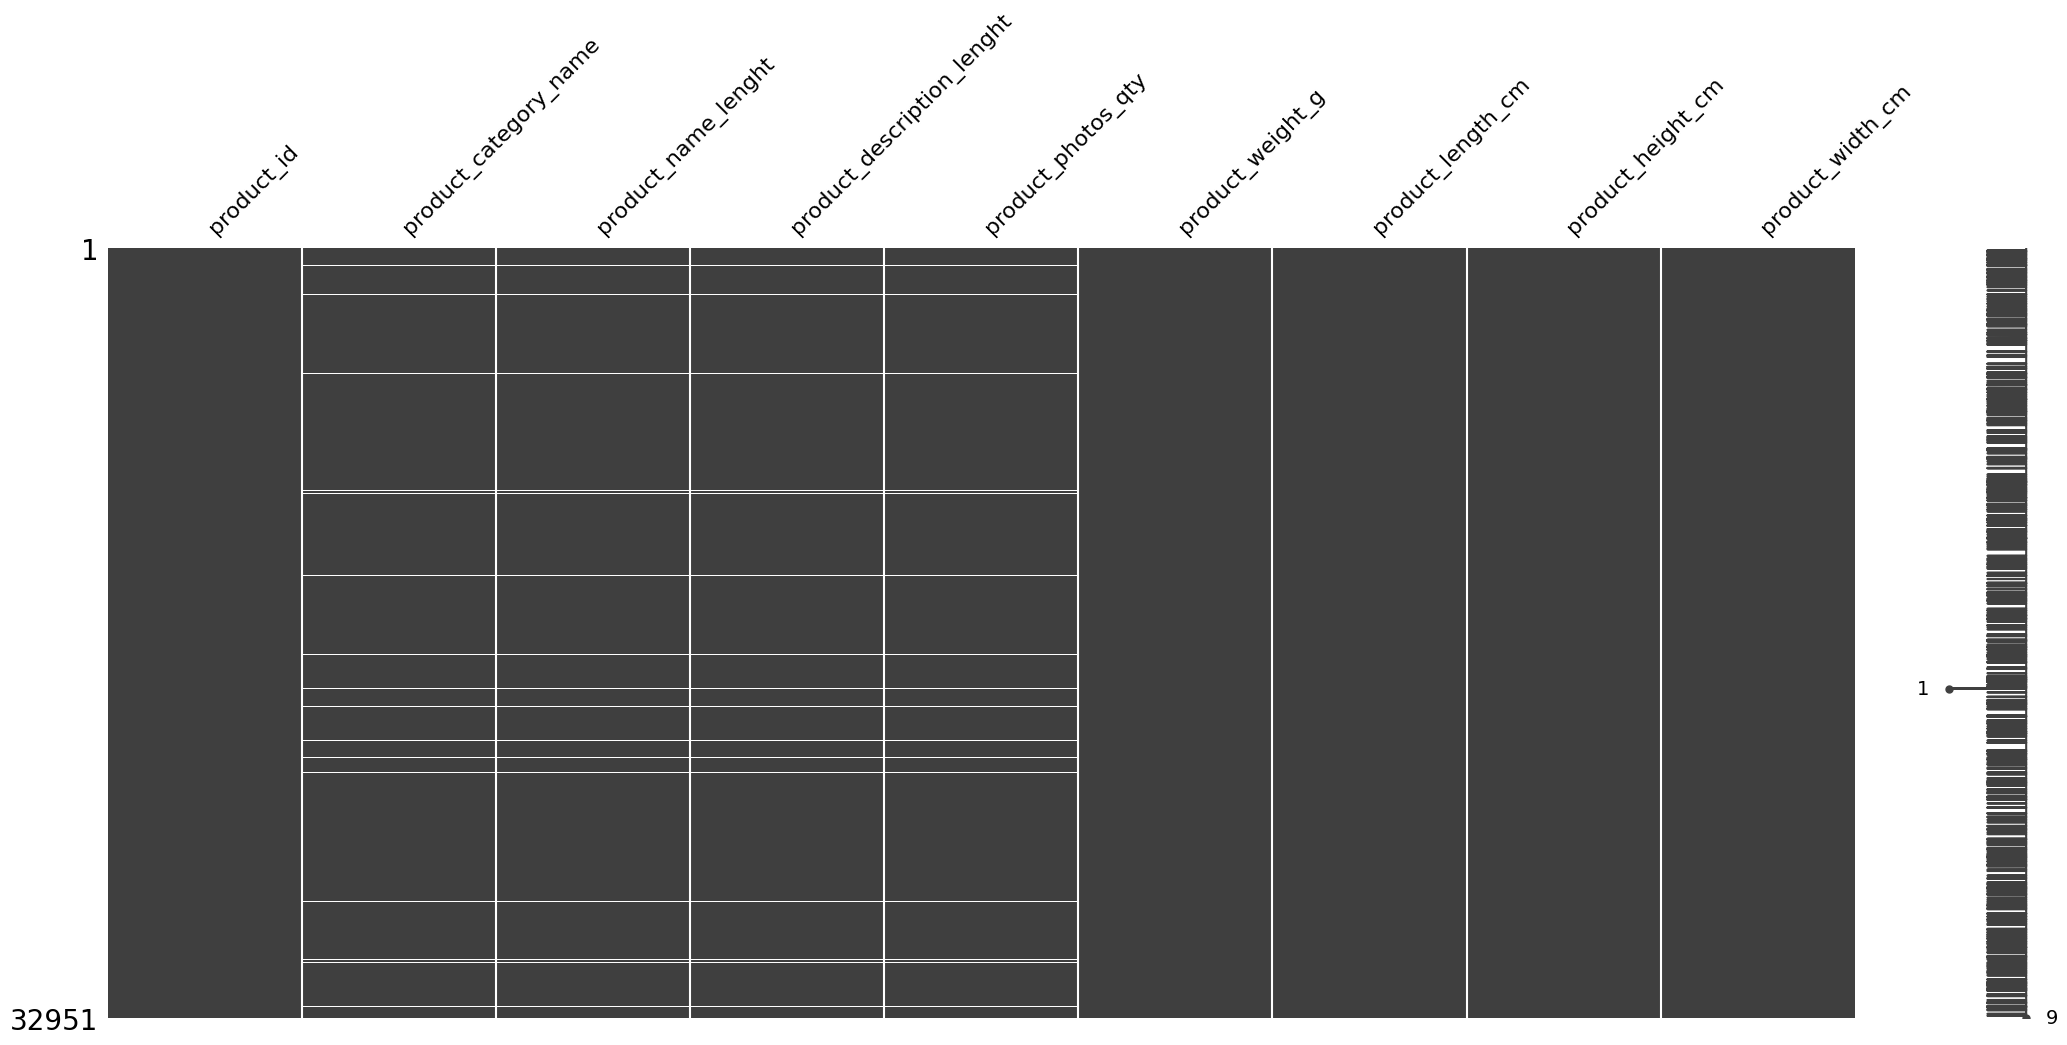

In [ ]:
msno.matrix(df_product)

<Axes: >

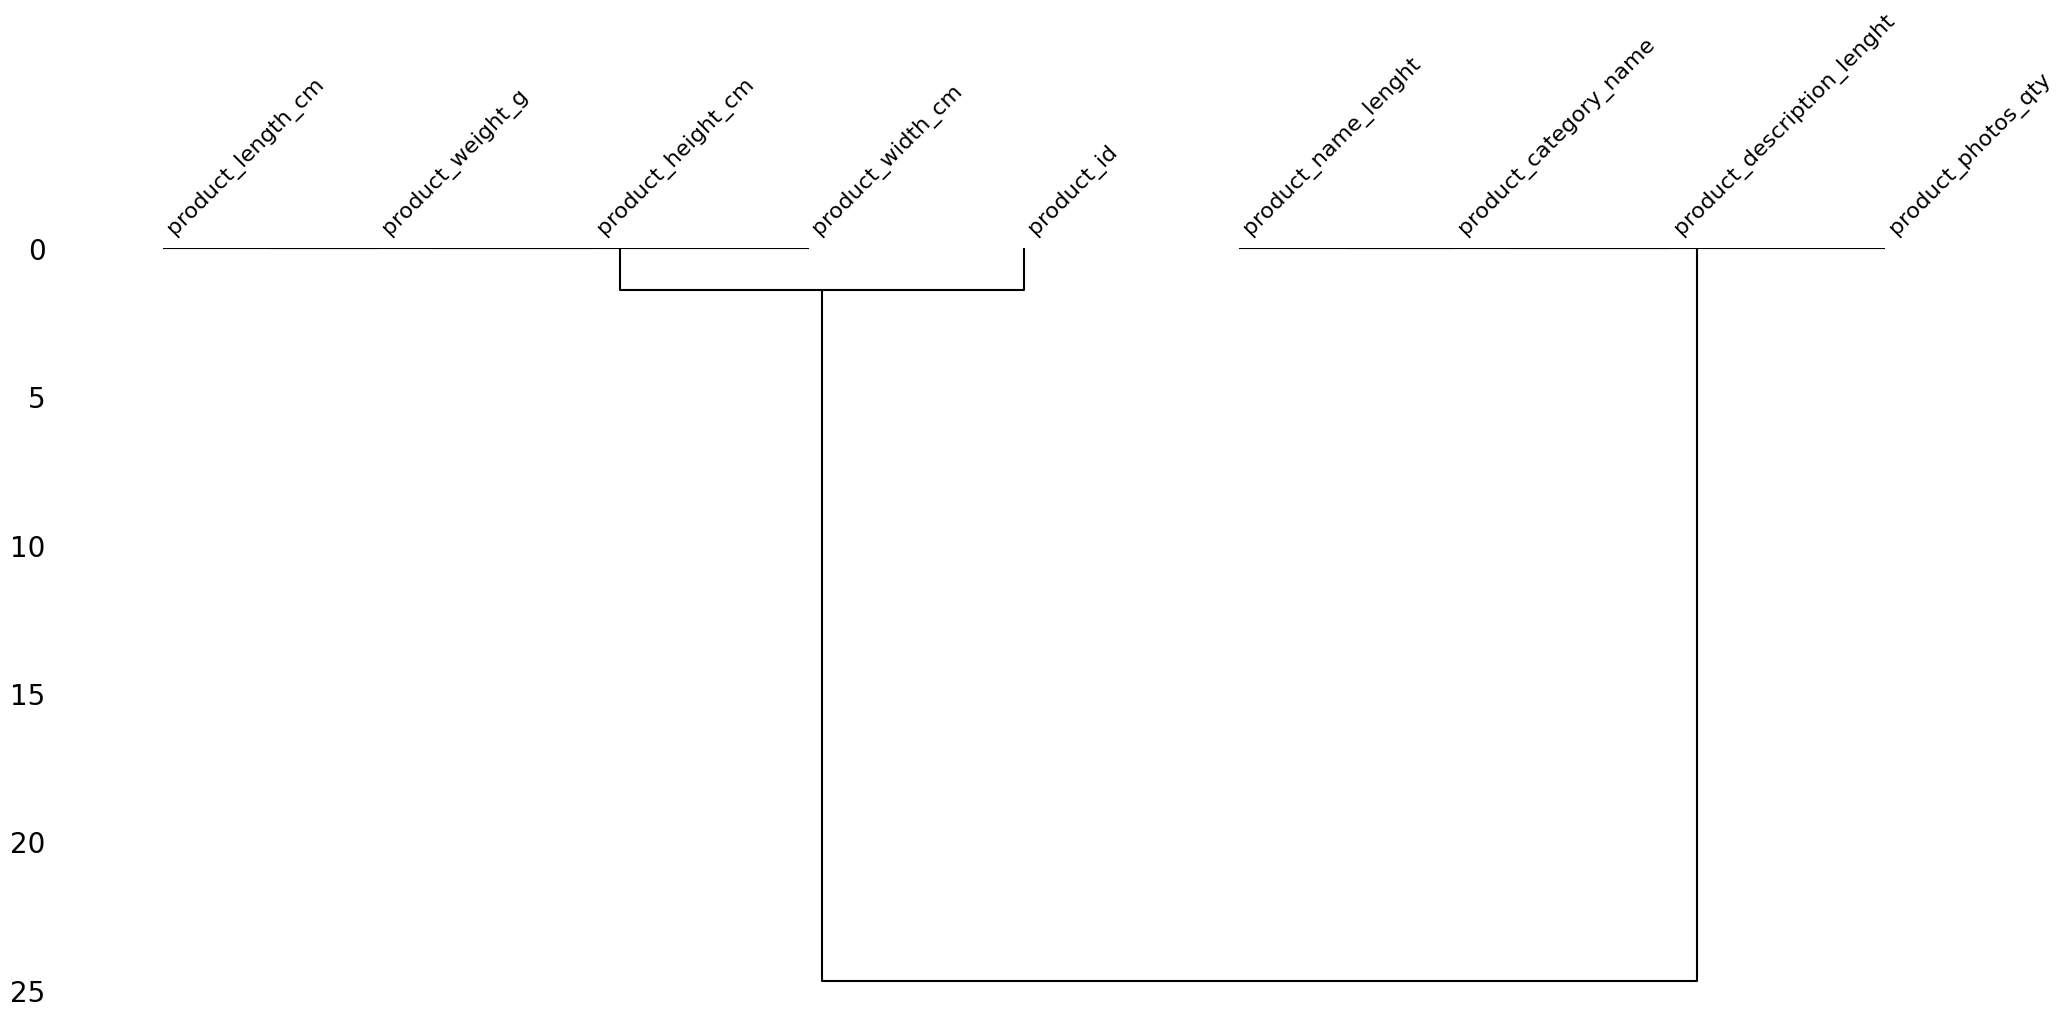

In [ ]:
msno.dendrogram(df_product)

<Axes: >

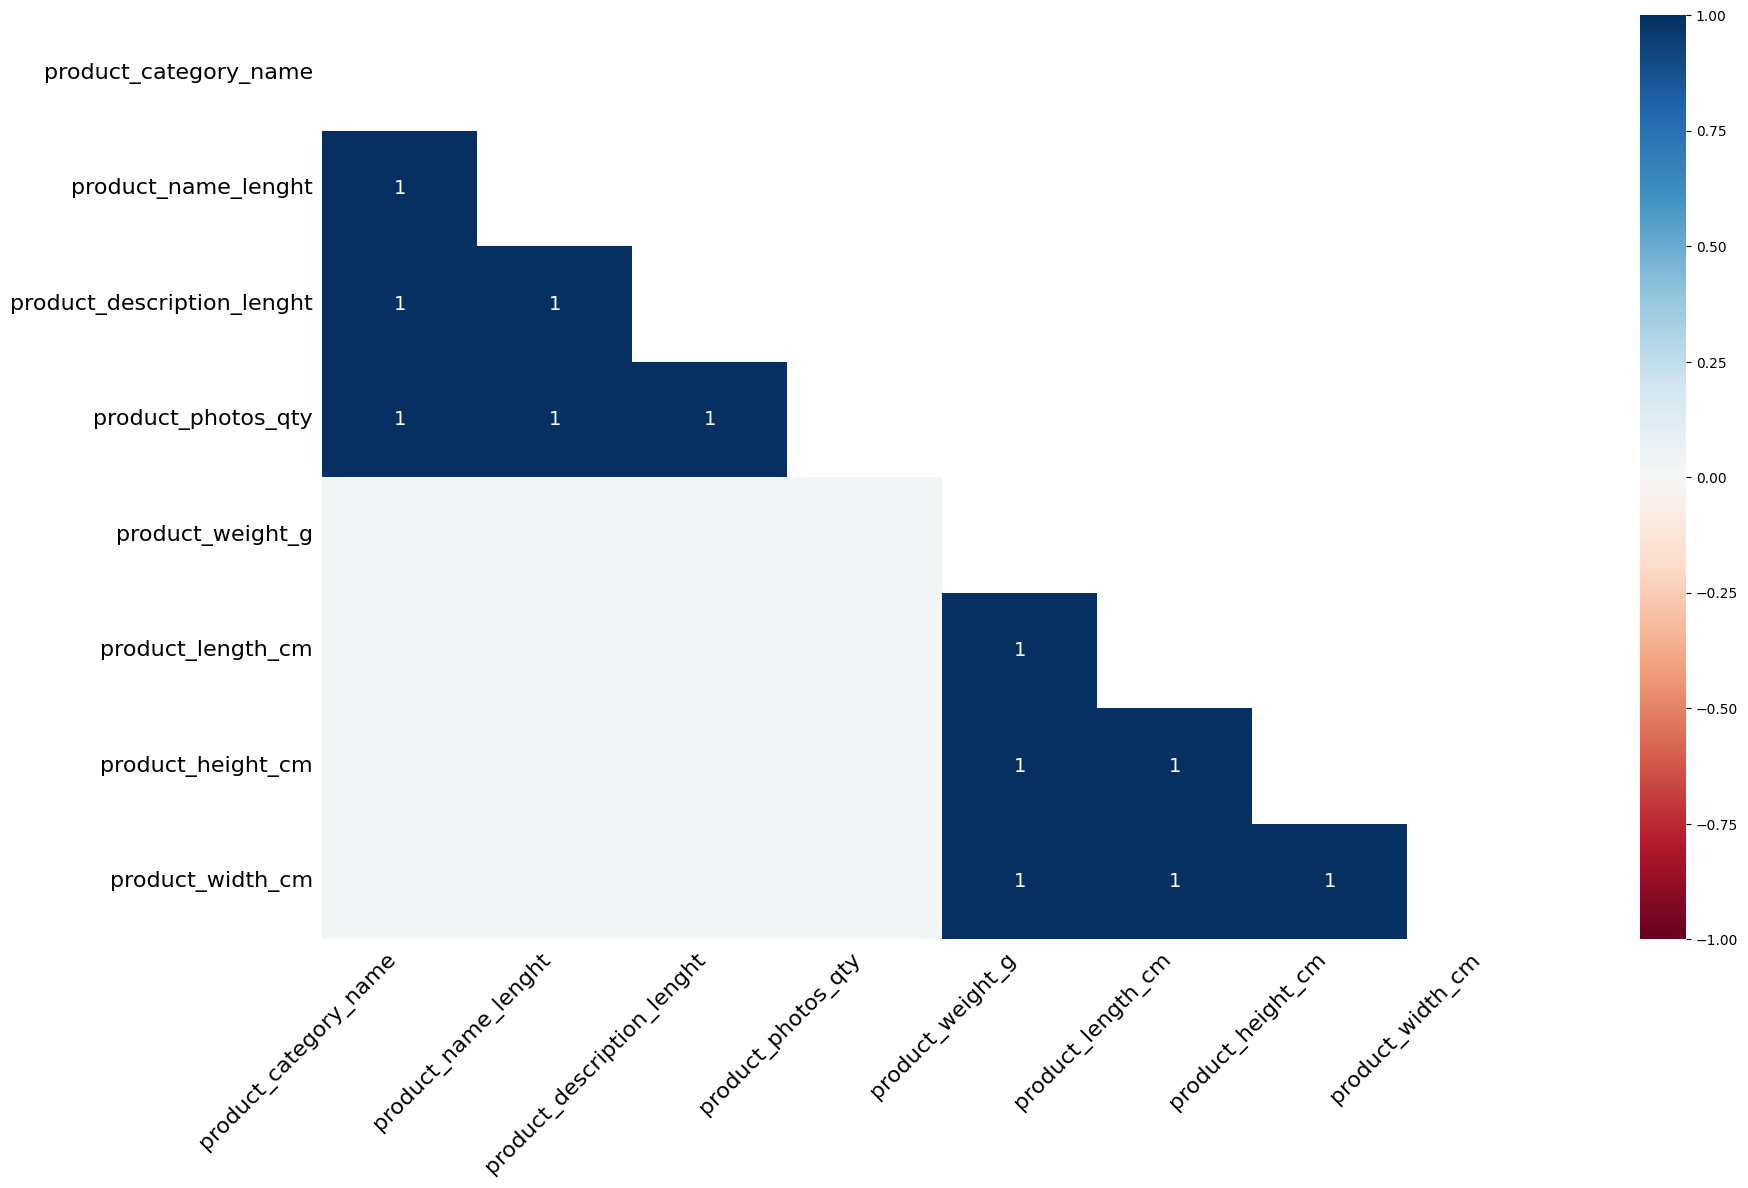

In [ ]:
msno.heatmap(df_product)

In [ ]:
df_product[df_product.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


> Jika dianalisa dari dataset product, mengapa terjadi missing value dari beberapa kolom disebabkan oleh:
> - Missing value tampaknya terjadi karena ada hubungannya dengan `product_category_name`.
>- jika terdapat missing value pada kolom `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, maka ini bisa jadi dipicu karena terdapat missing value pada kolom `product_category_name` sebelumnya, sehingga keterangan dari produk tersebut yang diidentifikasi berdasarkan 'nama kategori produk/product category name' tidak dapat diberikan informasinya pada kolom setelahnya yaitu `product_name_lenght`, `product_description_lenght`, `product_photos_qty`.

> Pengambilan keputusan:
> - Walaupun missing value ini dapat dihapus (secara teoritis missing value < 5%), sebaiknya diberi label khusus seperti 'unknown' untuk dapat dianalisa.
> - Menghapus kolom `product_name_lenght`,	`product_description_lenght`, `product_photos_qty`,	`product_weight_g`,	`product_length_cm`,	`product_height_cm`,	`product_width_cm`.
> - Kolom yang dihapus tidak revelan untuk masuk dalam RFM Analysis untuk tujuan Customer Segmentation.


######**Take Decisions**

In [ ]:
# drop irrelevan columns
df_product = df_product.drop(columns=['product_name_lenght', 'product_description_lenght',
                                  'product_photos_qty', 'product_weight_g', 'product_length_cm',
                                  'product_height_cm', 'product_width_cm'], axis=1)

In [ ]:
# fill NaN in a product category name column
df_product['product_category_name'].fillna('unknown', inplace=True)

###**- Check Duplicated Values**

In [ ]:
# create function to check data duplicated
def check_duplicated(data):
  duplicated_values = pd.Series(data.duplicated().sum(), name='Duplicated')
  duplicated_percent = pd.Series(data.duplicated().sum() / len(data) * 100, name='Percentage')
  return pd.concat([duplicated_values, duplicated_percent], axis=1)

####**df_customer**

In [ ]:
check_duplicated(df_customer)

,Duplicated,Percentage
0,0,0.0


####**df_order**

In [ ]:
check_duplicated(df_order)

,Duplicated,Percentage
0,0,0.0


####**df_order_items**

In [ ]:
check_duplicated(df_order_items)

,Duplicated,Percentage
0,0,0.0


####**df_order_payments**

In [ ]:
check_duplicated(df_order_payments)

,Duplicated,Percentage
0,614,0.591032


####**df_product**

In [ ]:
check_duplicated(df_product)

,Duplicated,Percentage
0,0,0.0


> - Terlihat ada data terduplikat di dataset `df_order_payments` dan `df_order_items`


#####**Take Decisions**

In [ ]:
# drop duplicates from df_order_payments
df_order_payments = df_order_payments.drop_duplicates(subset=['order_id', 'payment_type',
                                                        'payment_installments', 'payment_value' ])

In [ ]:
# check again after drop duplicated
check_duplicated(df_order_payments)

,Duplicated,Percentage
0,0,0.0


> - Terlihat tidak ada data terduplikat dari dataset setelah drop data yang terduplicat


##**4. Merged Dataset**



In [ ]:
# Merging datasets step by step
# Merge Orders DataFrame with Customers DataFrame
merged_df1 = pd.merge(df_order, df_customer, on='customer_id', how='left')

# Merge the above result with Order Items DataFrame
merged_df2 = pd.merge(merged_df1, df_order_items, on='order_id',how='left')

# Merge the above result with Order Payments DataFrame
merged_df3 = pd.merge(merged_df2, df_order_payments, on='order_id', how='left')

# Finally, merge the above result with Products DataFrame
df_final_merged = pd.merge(merged_df3, df_product, on='product_id', how='left')

# Display the structure of the final merged dataframe
df_final_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,product_id,price,freight_value,count_order,calculated_payment_value,payment_type,payment_installments,payment_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,1.0,38.71,credit_card,1.0,18.12,utilidades_domesticas
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,1.0,38.71,voucher,1.0,2.00,utilidades_domesticas
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,1.0,38.71,voucher,1.0,18.59,utilidades_domesticas
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,1.0,141.46,boleto,1.0,141.46,perfumaria
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,1.0,179.12,credit_card,3.0,179.12,automotivo


In [ ]:
# check again information of dataset after merged
df_final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105899 entries, 0 to 105898
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  105899 non-null  object 
 1   customer_id               105899 non-null  object 
 2   order_status              105899 non-null  object 
 3   order_purchase_timestamp  105899 non-null  object 
 4   customer_city             105899 non-null  object 
 5   customer_state            105899 non-null  object 
 6   product_id                105729 non-null  object 
 7   price                     105729 non-null  float64
 8   freight_value             105729 non-null  float64
 9   count_order               105729 non-null  float64
 10  calculated_payment_value  105729 non-null  float64
 11  payment_type              105898 non-null  object 
 12  payment_installments      105898 non-null  float64
 13  payment_value             105898 non-null  f

> - Tipe data dari kolom `order_purchase_timestamp` perlu diubah menjadi **datetime**

###**Check Missing Value After Merged**

In [ ]:
df_final_merged[df_final_merged.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,product_id,price,freight_value,count_order,calculated_payment_value,payment_type,payment_installments,payment_value,product_category_name
1215,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,not_defined,1.0,0.00,NaN
1920,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,santa luzia,MG,NaN,NaN,NaN,NaN,NaN,voucher,1.0,191.46,NaN
1993,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,castanhal,PA,NaN,NaN,NaN,NaN,NaN,boleto,1.0,139.96,NaN
2171,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,campinas,SP,NaN,NaN,NaN,NaN,NaN,voucher,1.0,66.44,NaN
2310,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,credit_card,2.0,72.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104015,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,cariacica,ES,NaN,NaN,NaN,NaN,NaN,credit_card,1.0,157.13,NaN
104802,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,atibaia,SP,NaN,NaN,NaN,NaN,NaN,credit_card,1.0,280.20,NaN
105327,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,sao bernardo do campo,SP,NaN,NaN,NaN,NaN,NaN,voucher,1.0,54.42,NaN
105733,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,santos,SP,NaN,NaN,NaN,NaN,NaN,voucher,1.0,63.89,NaN


In [ ]:
check_missing(df_final_merged)

,Missing Values,Percentage
order_id,0,0.000000
customer_id,0,0.000000
order_status,0,0.000000
order_purchase_timestamp,0,0.000000
customer_city,0,0.000000
customer_state,0,0.000000
product_id,170,0.160530
price,170,0.160530
freight_value,170,0.160530
count_order,170,0.160530


In [ ]:
df_final_merged = df_final_merged.dropna(axis=0)

In [ ]:
df_final_merged.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_city               0
customer_state              0
product_id                  0
price                       0
freight_value               0
count_order                 0
calculated_payment_value    0
payment_type                0
payment_installments        0
payment_value               0
product_category_name       0
dtype: int64

In [ ]:
df_final_merged[df_final_merged.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,product_id,price,freight_value,count_order,calculated_payment_value,payment_type,payment_installments,payment_value,product_category_name


###**Check Data Duplicated After Merged**

In [ ]:
df_final_merged.duplicated().sum()

0

> - Terlihat tidak ada data yang terduplikat.

###**Check Payment Value and Calculated Payment Value**

In [ ]:
# Find the rows where 'payment_value' does not match 'calculated_payment_value'
df_final_merged[df_final_merged['payment_value'] != df_final_merged['calculated_payment_value']]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,product_id,price,freight_value,count_order,calculated_payment_value,payment_type,payment_installments,payment_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,1.0,38.71,credit_card,1.0,18.12,utilidades_domesticas
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,1.0,38.71,voucher,1.0,2.00,utilidades_domesticas
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,1.0,38.71,voucher,1.0,18.59,utilidades_domesticas
10,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,sorocaba,SP,9a78fb9862b10749a117f7fc3c31f051,149.99,19.77,1.0,169.76,voucher,1.0,161.42,moveis_escritorio
11,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,sorocaba,SP,9a78fb9862b10749a117f7fc3c31f051,149.99,19.77,1.0,169.76,credit_card,1.0,8.34,moveis_escritorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105888,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,cuiaba,MT,c982dbea53b864f4d27c1d36f14b6053,42.11,0.80,1.0,42.91,voucher,1.0,64.37,brinquedos
105889,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,cuiaba,MT,49d2e2460386273b195e7e59b43587c3,26.90,36.98,1.0,63.88,credit_card,2.0,42.42,brinquedos
105890,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,cuiaba,MT,49d2e2460386273b195e7e59b43587c3,26.90,36.98,1.0,63.88,voucher,1.0,64.37,brinquedos
105891,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,divinopolis,MG,9fc063fd34fed29ccc57b7f8e8d03388,370.00,19.43,1.0,389.43,voucher,1.0,250.00,beleza_saude


In [ ]:
# Find the rows where 'payment_value' does not match 'calculated_payment_value'
df_final_merged[df_final_merged['payment_value'] == df_final_merged['calculated_payment_value']]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,product_id,price,freight_value,count_order,calculated_payment_value,payment_type,payment_installments,payment_value,product_category_name
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,1.0,141.46,boleto,1.0,141.46,perfumaria
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,1.0,179.12,credit_card,3.0,179.12,automotivo
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,1.0,72.20,credit_card,1.0,72.20,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,1.0,28.62,credit_card,1.0,28.62,papelaria
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,congonhinhas,PR,060cb19345d90064d1015407193c233d,147.90,27.36,1.0,175.26,credit_card,6.0,175.26,automotivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105894,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,sao jose dos campos,SP,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,1.0,85.08,credit_card,3.0,85.08,beleza_saude
105895,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,praia grande,SP,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,1.0,195.00,credit_card,3.0,195.00,bebes
105896,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,nova vicosa,BA,b80910977a37536adeddd63663f916ad,205.99,65.02,1.0,271.01,credit_card,5.0,271.01,eletrodomesticos_2
105897,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,japuiba,RJ,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,2.0,441.16,credit_card,4.0,441.16,informatica_acessorios


> - Terlihat bahwa setelah dicheck ulang antara `payment_value` dengan `calculated_payment_value`, terdapat perbedaan sebesar 14032 baris data. Hal ini bisa saja terjadi karena kesalahan sistem atau terdapat diskon yang menyebabkan perbedaan antara `payment_value` dengan `calculated_payment_value`.
> - karena kita tidak mengakomodir diskon pada `payment_value` atau kesalahan yang terjadi. maka kita hanya mempergunakan data yang matching antara `payment_value` dengan `calculated_payment_value`.

In [ ]:
# Define new dataframe after check payment value with calculated payment value'
df_clean = df_final_merged[df_final_merged['payment_value'] == df_final_merged['calculated_payment_value']].reset_index(drop=True)

In [ ]:
df_clean

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,product_id,price,freight_value,count_order,calculated_payment_value,payment_type,payment_installments,payment_value,product_category_name
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,1.0,141.46,boleto,1.0,141.46,perfumaria
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,1.0,179.12,credit_card,3.0,179.12,automotivo
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,1.0,72.20,credit_card,1.0,72.20,pet_shop
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,1.0,28.62,credit_card,1.0,28.62,papelaria
4,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,congonhinhas,PR,060cb19345d90064d1015407193c233d,147.90,27.36,1.0,175.26,credit_card,6.0,175.26,automotivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91691,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,sao jose dos campos,SP,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,1.0,85.08,credit_card,3.0,85.08,beleza_saude
91692,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,praia grande,SP,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,1.0,195.00,credit_card,3.0,195.00,bebes
91693,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,nova vicosa,BA,b80910977a37536adeddd63663f916ad,205.99,65.02,1.0,271.01,credit_card,5.0,271.01,eletrodomesticos_2
91694,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,japuiba,RJ,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,2.0,441.16,credit_card,4.0,441.16,informatica_acessorios


##**5. Data Formatting**

In [ ]:
# Mengubah tipe data ke datetime
df_clean['order_purchase_timestamp'] = pd.to_datetime(df_clean['order_purchase_timestamp'])

# Menambahkan kolom baru untuk format tahun-bulan-hari dan tahun-bulan
df_clean['date_year_month_day'] = df_clean['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
df_clean['date_year_month'] = df_clean['order_purchase_timestamp'].dt.strftime('%Y-%m')

# Mengubah kolom date_year_month_day kembali ke format datetime
df_clean['date_year_month_day'] = pd.to_datetime(df_clean['date_year_month_day'])

# Merubah urutan kolom
df_clean = df_clean[['order_id', 'customer_id', 'product_id','order_purchase_timestamp',
                     'date_year_month_day', 'date_year_month', 'order_status',
                     'customer_city', 'customer_state', 'product_category_name',
                     'payment_type', 'payment_installments','count_order', 'price',
                     'freight_value', 'payment_value','calculated_payment_value']]

In [ ]:
# check again information of merged dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91696 entries, 0 to 91695
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  91696 non-null  object        
 1   customer_id               91696 non-null  object        
 2   product_id                91696 non-null  object        
 3   order_purchase_timestamp  91696 non-null  datetime64[ns]
 4   date_year_month_day       91696 non-null  datetime64[ns]
 5   date_year_month           91696 non-null  object        
 6   order_status              91696 non-null  object        
 7   customer_city             91696 non-null  object        
 8   customer_state            91696 non-null  object        
 9   product_category_name     91696 non-null  object        
 10  payment_type              91696 non-null  object        
 11  payment_installments      91696 non-null  float64       
 12  count_order       

> - Terlihat format/tipe data pada semua kolom sudah tepat.

In [ ]:
df_clean

,order_id,customer_id,product_id,order_purchase_timestamp,date_year_month_day,date_year_month,order_status,customer_city,customer_state,product_category_name,payment_type,payment_installments,count_order,price,freight_value,payment_value,calculated_payment_value
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,2018-07-24 20:41:37,2018-07-24,2018-07,delivered,barreiras,BA,perfumaria,boleto,1.0,1.0,118.70,22.76,141.46,141.46
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:38:49,2018-08-08,2018-08,delivered,vianopolis,GO,automotivo,credit_card,3.0,1.0,159.90,19.22,179.12,179.12
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:28:06,2017-11-18,2017-11,delivered,sao goncalo do amarante,RN,pet_shop,credit_card,1.0,1.0,45.00,27.20,72.20,72.20
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 21:18:39,2018-02-13,2018-02,delivered,santo andre,SP,papelaria,credit_card,1.0,1.0,19.90,8.72,28.62,28.62
4,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,060cb19345d90064d1015407193c233d,2017-07-09 21:57:05,2017-07-09,2017-07,delivered,congonhinhas,PR,automotivo,credit_card,6.0,1.0,147.90,27.36,175.26,175.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91691,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,ac35486adb7b02598c182c2ff2e05254,2017-03-09 09:54:05,2017-03-09,2017-03,delivered,sao jose dos campos,SP,beleza_saude,credit_card,3.0,1.0,72.00,13.08,85.08,85.08
91692,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,f1d4ce8c6dd66c47bbaa8c6781c2a923,2018-02-06 12:58:58,2018-02-06,2018-02,delivered,praia grande,SP,bebes,credit_card,3.0,1.0,174.90,20.10,195.00,195.00
91693,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,b80910977a37536adeddd63663f916ad,2017-08-27 14:46:43,2017-08-27,2017-08,delivered,nova vicosa,BA,eletrodomesticos_2,credit_card,5.0,1.0,205.99,65.02,271.01,271.01
91694,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-08 21:28:27,2018-01-08,2018-01,delivered,japuiba,RJ,informatica_acessorios,credit_card,4.0,2.0,179.99,40.59,441.16,441.16


##**6. Save Clean Dataset**

In [ ]:
# save new dataset after data preprocessing
df_clean.to_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Brazilian E-commerce Public Dataset/df_clean.csv', index=False)